## Getting started with SimFrame

This notebook will show how to set up SimFrame, load in a `MasterLattice` object and settings for tracking, and show how to plot the results.

It is assumed that the [MasterLattice](https://github.com/astec-stfc/masterlattice/) and [SimCodes](https://github.com/astec-stfc/simcodes/) repositories have been installed. Alternatively, these repos can be cloned and provided as keyword arguments `master_lattice=<loc>` and `simcodes=<loc>` on instantiation of the `Framework` class.

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt

import SimulationFramework.Framework as fw  # noqa E402
from SimulationFramework.Framework import load_directory  # noqa E402
import SimulationFramework.Modules.Beams as rbf  # noqa E402
import SimulationFramework.Modules.Twiss as rtf  # noqa E402

# Define a new framework instance, in directory 'getting_started'.
#       "clean" will empty (delete everything!) in the directory if true
#       "verbose" will print a progressbar if true
framework = fw.Framework(
        directory="./getting_started",
        clean=False,
        verbose=False
    )

scaling = 4

initializing ocelot...


Invalid MIT-MAGIC-COOKIE-1 key

### Preparing the simulation and tracking

Load a lattice definition file. These can be found in `Masterlattice/Lattices` by default.

In [4]:
framework.loadSettings("Lattices/clara400_v13_SP3.def")
startline = "generator"
endline = "S06"

Change all lattice codes to ASTRA/Elegant/GPT/Ocelot with exclusions (injector can only be done in ASTRA/GPT).

In [5]:
framework.change_Lattice_Code("All", "elegant", exclude=["injector400"])

# Individual lattice lines defined in the settings file can also be changed,
# i.e. framework.change_Lattice_Code("VBC", "elegant")

This is the code that generates the laser distribution (ASTRA or GPT)

In [6]:
framework.change_generator("ASTRA")

Load a starting laser distribution setting

In [7]:
framework.generator.load_defaults("clara_400_2ps_Gaussian")

Set the thermal emittance for the generator

In [8]:
framework.generator.thermal_emittance = 0.0005

This is a scaling parameter. it defines the number of particles to create at the gun (this is "ASTRA generator" which creates distributions).
The space charge 3D mesh in ASTRA/GPT performs best if the number of particles is a power of 8.

In [9]:
framework.generator.number_of_particles = 2 ** (3 * scaling)

Modify some lattice parameters

In [10]:
framework["CLA-S02-MAG-QUAD-01"].k1l += 0.1
framework["CLA-L03-LIN-CAV-01"].phase += 5
framework["bunch_compressor"].set_angle(0.090) 

Generate and track the bunch 

In [1]:
# framework.track(startfile=startline, endfile=endline)

The outputs from the simulation can now be loaded as follows, and we can plot the beam evolution along the line

In [4]:
# fwdir = load_directory("./getting_started", beams=True, verbose=True)

Found MasterLattice Package = /home/xkc85723/.local/lib/python3.12/site-packages/MasterLattice/
Found SimCodes Package = /home/xkc85723/.local/lib/python3.12/site-packages/SimCodes/
Directory: /home/xkc85723/Documents/simframe/docs/source/examples/notebooks/getting_started
elegant []
GPT []
ASTRA ['injector400.Xemit.001']
ocelot ['L4H_twiss.npz', 'S04_twiss.npz', 'VBC_twiss.npz', 'S05_twiss.npz', 'S06_twiss.npz', 'S02_twiss.npz', 'L03_twiss.npz', 'S03_twiss.npz', 'L02_twiss.npz']


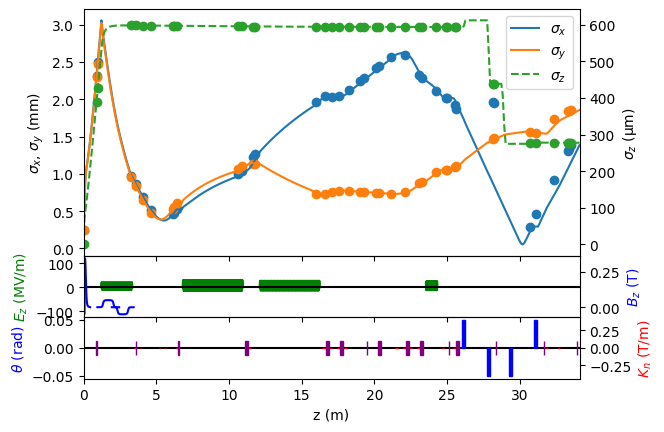

In [5]:
# plt1, fig1, ax1 = fwdir.plot(include_layout=True, include_particles=True, ykeys=['sigma_x', 'sigma_y'], ykeys2=['sigma_z'])